# Loteca matches found

In this notebook, we will explorer which loteca matches were found.

We have some objectives:

- Check if the matches found are enough to make a model
- Check if there are some matches not found that can easily be added to fulfill a "round"
- Take a look at the matches/rounds found along the time

**Remember**: There are some matches that didn't happen. For these, we don't have 
odds information.

## Load data

In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
from src.util import load_pickle

matches = load_pickle('../data/process/loteca_matches.pkl')
found_ids = load_pickle('../data/interim/loteca_matchlist.pkl')

## Explore

In [3]:
matches.head()

,roundno,gameno,date,team_h,goals_h,team_a,goals_a,happened
5110,366,1,2009-06-07,CRUZEIRO/MG,1,INTERNACIONAL/RS,1,True
5111,366,2,2009-06-07,ATLÉTICO/PR,0,ATLÉTICO/MG,4,True
5112,366,3,2009-06-07,AVAÍ/SC,0,SÃO PAULO/SP,0,True
5113,366,4,2009-06-06,AMÉRICA/RN,2,BRASILIENSE/DF,1,True
5114,366,5,2009-06-06,PONTE PRETA/SP,5,PORTUGUESA DESPORTOS/SP,2,True


In [4]:
# there are 6004 loteca matches
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6004 entries, 5110 to 11113
Data columns (total 8 columns):
roundno     6004 non-null int64
gameno      6004 non-null int64
date        5950 non-null datetime64[ns]
team_h      6004 non-null object
goals_h     6004 non-null int64
team_a      6004 non-null object
goals_a     6004 non-null int64
happened    6004 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(4), object(2)
memory usage: 381.1+ KB


In [5]:
# of those, 5950 happened and 54 didn't
matches.happened.value_counts()

True     5950
False      54
Name: happened, dtype: int64

In [6]:
# let's worry only about those that happened
matches = matches[matches.happened]

In [7]:
# all found matches happened
all([id in matches.index for id in found_ids])

True

In [8]:
found_ids[:5]

[5110, 5111, 5112, 5113, 5115]

In [9]:
# 4969 matches were found
len(found_ids)

4969

In [10]:
# this percentage
4969 / 5950

0.8351260504201681

## Assemble everything into the matches DataFrame

In [11]:
matches = matches.copy()
matches['found'] = matches.index.isin(found_ids)
matches.head()

,roundno,gameno,date,team_h,goals_h,team_a,goals_a,happened,found
5110,366,1,2009-06-07,CRUZEIRO/MG,1,INTERNACIONAL/RS,1,True,True
5111,366,2,2009-06-07,ATLÉTICO/PR,0,ATLÉTICO/MG,4,True,True
5112,366,3,2009-06-07,AVAÍ/SC,0,SÃO PAULO/SP,0,True,True
5113,366,4,2009-06-06,AMÉRICA/RN,2,BRASILIENSE/DF,1,True,True
5114,366,5,2009-06-06,PONTE PRETA/SP,5,PORTUGUESA DESPORTOS/SP,2,True,True


In [12]:
# see results by round
rounds = matches.groupby('roundno').found.sum().astype(int)
rounds.head()

roundno
366    12
367    12
368    14
369    12
370    12
Name: found, dtype: int64

In [13]:
rounds.value_counts()

14    217
13     62
12     38
6      16
0      15
10     14
5      13
11     12
7       9
8       8
4       8
9       6
3       4
2       4
1       3
Name: found, dtype: int64

In [14]:
# so we have completely found half of the rounds
# there are also lots of rounds with 13 or 12 founds
# we can explorer them a bit more
rounds.value_counts() / len(rounds)

14    0.505828
13    0.144522
12    0.088578
6     0.037296
0     0.034965
10    0.032634
5     0.030303
11    0.027972
7     0.020979
8     0.018648
4     0.018648
9     0.013986
3     0.009324
2     0.009324
1     0.006993
Name: found, dtype: float64

In [15]:
_rounds = rounds.to_frame().rename(columns={'found': 'nfound'}).reset_index()
matches = matches.merge(_rounds, how='left', on='roundno')

In [16]:
close = matches[matches.nfound.isin([12, 13]) & ~matches.found]
close.head()

,roundno,gameno,date,team_h,goals_h,team_a,goals_a,happened,found,nfound
7,366,8,2009-06-07,CONFIANÇA/SE,1,SERGIPE/SE,2,True,False,12
8,366,9,2009-06-07,CRB/AL,0,ASA/AL,1,True,False,12
18,367,5,2009-06-14,PAYSANDU/PA,3,RIO BRANCO/AC,1,True,False,12
19,367,6,2009-06-14,BRASIL/RS,1,CRICIÚMA/SC,0,True,False,12
49,369,8,2009-06-27,CRB/AL,1,ICASA/CE,2,True,False,12


In [17]:
# there are 80 rounsd we can possibly save
# this is a value worth fighting for!
close.roundno.nunique()

80

In [18]:
# first, let's take a look in the last rounds

close.tail(10)[::-1]

,roundno,gameno,date,team_h,goals_h,team_a,goals_a,happened,found,nfound
5906,791,12,2018-03-18,SPORTING CLUBE/PRT,2,RIO AVE/PRT,0,True,False,13
5845,787,6,2018-02-18,CAXIAS/RS,1,JUVENTUDE/RS,1,True,False,13
5485,761,7,2017-08-05,LONDRINA/PR,0,VILA NOVA/GO,1,True,False,13
5306,748,8,2017-05-07,REMO/PA,1,PAYSANDU/PA,2,True,False,12
5294,747,10,2017-04-29,SÃO RAIMUNDO/PA,1,INDEPENDENTE/PA,1,True,False,12
5288,747,4,2017-04-30,PAYSANDU/PA,1,REMO/PA,1,True,False,12
5279,746,9,2017-04-23,MOGI MIRIM/SP,1,RIO PRETO/SP,2,True,False,13
5247,744,5,2017-04-09,SANTA CRUZ/PE,1,NÁUTICO/PE,2,True,False,13
5156,737,9,2017-02-19,NOVO HAMBURGO/RS,4,JUVENTUDE/RS,1,True,False,12
5119,734,13,2017-01-28,VITÓRIA/ES,1,LINHARES/ES,0,True,False,13


# Things we can add:

- Portugal leagues ([1])
- Matches that are 2 days late ([2], [8], [9])
- Matches that are 3 days late (wtf?) ([3], [5])
- Matches with the teams inverted ([4], [6])
- Small matches (not found in BetExplorer)
    - 7 (Campeonato Paulista - Série A2)
    - 10 (Copa Espírito Santo)

[1]: http://www.betexplorer.com/soccer/portugal/primeira-liga/sporting-rio-ave/SCVTleMN/
[2]: http://www.betexplorer.com/soccer/brazil/campeonato-gaucho/ser-caxias-juventude/zPDIlQfa/
[3]: http://www.betexplorer.com/soccer/brazil/serie-b-2017/londrina-vila-nova-fc/McsZbEbP/
[4]: http://www.betexplorer.com/soccer/brazil/campeonato-paraense-2017/paysandu-pa-remo/IiTIsCz4/
[5]: http://www.betexplorer.com/soccer/brazil/campeonato-paraense-2017/sao-raimundo-pa-independente/OUTErhLc/
[6]: http://www.betexplorer.com/soccer/brazil/campeonato-paraense-2017/remo-paysandu-pa/ARPAqY5i/
[8]: http://www.betexplorer.com/soccer/brazil/campeonato-pernambucano-2017/santa-cruz-nautico/x2FluYXe/
[9]: http://www.betexplorer.com/soccer/brazil/campeonato-gaucho-2017/novo-hamburgo-juventude/vwKLUkYb/

##### Observations:

- Some BetExplorer dates are wrong by 1 day because of the timezone.
- Some loteca matches are wrong by more days. This may be their error or a signal 
  that the match changed dates. For example, there was a match that was postponed 
  two days ([1]).
- We just search information for a tiny amount of games, but, this may
  already justify a more flexible date matching in our algorithm.
 
[1]: http://www.fpfpara.com.br/conteudos/noticia/40347/partida-entre-sao-raimundo-x-independente-sofre-alteracao-confira

In [19]:
# and the first rounds

close.head(10)

,roundno,gameno,date,team_h,goals_h,team_a,goals_a,happened,found,nfound
7,366,8,2009-06-07,CONFIANÇA/SE,1,SERGIPE/SE,2,True,False,12
8,366,9,2009-06-07,CRB/AL,0,ASA/AL,1,True,False,12
18,367,5,2009-06-14,PAYSANDU/PA,3,RIO BRANCO/AC,1,True,False,12
19,367,6,2009-06-14,BRASIL/RS,1,CRICIÚMA/SC,0,True,False,12
49,369,8,2009-06-27,CRB/AL,1,ICASA/CE,2,True,False,12
50,369,9,2009-06-27,MARÍLIA/SP,2,CAXIAS/RS,0,True,False,12
59,370,5,2009-07-05,MIXTO/MT,2,GAMA/DF,2,True,False,12
73,371,5,2009-07-12,RIO BRANCO/AC,4,PAYSANDU/PA,0,True,False,12
74,371,6,2009-07-12,CRB/AL,2,CONFIANÇA/SE,1,True,False,12
88,372,6,2009-07-19,CAXIAS/RS,1,MARÍLIA/SP,1,True,False,13


## Things we can add

- Small matches
    - 1: Campeonato Sergipano - 2009
    - 2: Série C - 2009
    - 3: Série C - 2009
    - 4: Série C - 2009
    - 5: Série C - 2009
    - 6: Série C - 2009
    - 7: Série C - 2009
    - 8: Série C - 2009
    - 9: Série C - 2009
    - 10: Série C - 2009
    
The odds from Série C only started being available in 2013.

So, that's a long way to go.

# Comparing the amount of matches found over time

In [20]:
_rounds = rounds.to_frame().rename(columns={'found': 'nfound'})
_dates = matches.groupby('roundno').date.max()
_rounds = _rounds.join(_dates)
_rounds.head()

,nfound,date
roundno,,
366,12,2009-06-07
367,12,2009-06-14
368,14,2009-06-21
369,12,2009-06-28
370,12,2009-07-05


Text(0,0.5,'Percentage')

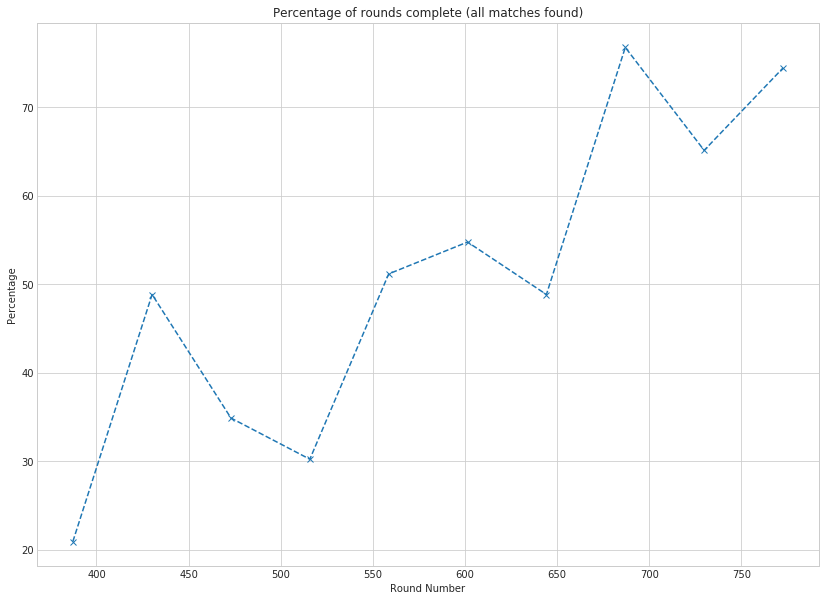

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

cut = pd.cut(_rounds.index, 10)

ys = _rounds.groupby(cut).apply(lambda x: (x.nfound == 14).sum() / len(x)) * 100
xs = [x.mid for x in ys.index]

plt.figure(figsize=(14, 10))
plt.plot(xs, ys, 'x--')
plt.title("Percentage of rounds complete (all matches found)");
plt.xlabel("Round Number")
plt.ylabel("Percentage")